In [2]:
import os
import pandas as pd
import ast
import matplotlib.pyplot as plt
import seaborn as sns
import numpy as np

In [10]:
def load_top_results_per_algo(folder_path, sort_by="test", top_n=100):
    """
    Load all result CSV files from a folder and return the top-N performing results per algorithm.

    Parameters:
        folder_path (str): Path to the folder containing result CSV files.
        sort_by (str): Column name to sort by (default: 'test').
        top_n (int): Number of top rows to return per algorithm (default: 10).

    Returns:
        pd.DataFrame: Top-N rows per algorithm, sorted by `sort_by` metric.
    """
    all_results = []

    for file in os.listdir(folder_path):
        if file.endswith(".csv"):
            file_path = os.path.join(folder_path, file)
            df = pd.read_csv(file_path)

            # Parse theta column if present
            for col in df.columns:
                if "theta" in col and "parsed" not in col:
                    df["theta_parsed"] = df[col].apply(ast.literal_eval)
                    break

            all_results.append(df)

    if not all_results:
        raise ValueError("No CSV files found in the specified folder.")

    full_df = pd.concat(all_results, ignore_index=True)

    # Top-N results per algorithm
    top_per_alg = (
        full_df.sort_values(by=sort_by, ascending=True)  # lower is better if it's loss
        .groupby("alg")
        .head(top_n)
        .reset_index(drop=True)
    )

    return top_per_alg


In [91]:
best_df = load_top_results_per_algo("./results", sort_by="test", top_n=50)
print(best_df[["alg", "train", "test", "theta_parsed"]])

     alg         train         test  \
0    ABC -56382.460376 -8715.674840   
1    ABC -47422.631069 -8684.058276   
2    ABC -53961.666296 -8684.058276   
3    GWO -50141.231316 -8684.058276   
4    PSO -56656.637452 -8684.058276   
..   ...           ...          ...   
195  GWO -54791.822855 -4966.415417   
196  GWO -54791.822855 -4966.415417   
197  GWO -54791.822855 -4966.415417   
198  GWO -59288.814463 -4963.506229   
199  GWO -77040.409802 -4931.772861   

                                          theta_parsed  
0    [5.828558506265031, 2.2682425324336823, 0.05, ...  
1    [5.726237696750832, 1.6608112726685442, 0.0558...  
2    [6.234068567605634, 0.43177556394918015, 0.330...  
3    [5.520001809500798, 0.26336871939634027, 0.230...  
4    [5.725219965529158, 0.23404745680519312, 0.05,...  
..                                                 ...  
195  [5.0, 0.3808543862350439, 0.07008989228655181,...  
196  [5.0, 0.49784487798854277, 0.385498609535921, ...  
197  [5.0, 0.04039

In [92]:
best_df

,alg,seed,train,test,theta,pop_size,gens,stalled_gens,tolerance,patience,fitness_history,time(seconds),theta_parsed,"theta [d1, t1, a1, d2, t2, a2, shift]"
0,ABC,962,-56382.460376,-8715.674840,NaN,50,16,10,0.0001,10,"[-9830.26934796036, -10404.51244092203, -23558...",4.10,"[5.828558506265031, 2.2682425324336823, 0.05, ...","[5.828558506265031, 2.2682425324336823, 0.05, ..."
1,ABC,784,-47422.631069,-8684.058276,NaN,50,15,10,0.0001,10,"[-34893.566995970206, -34893.566995970206, -34...",3.82,"[5.726237696750832, 1.6608112726685442, 0.0558...","[5.726237696750832, 1.6608112726685442, 0.0558..."
2,ABC,830,-53961.666296,-8684.058276,NaN,50,21,10,0.0001,10,"[-7788.227269689354, -25033.907622279417, -407...",5.90,"[6.234068567605634, 0.43177556394918015, 0.330...","[6.234068567605634, 0.43177556394918015, 0.330..."
3,GWO,68,-50141.231316,-8684.058276,NaN,50,22,10,0.0001,10,"[-9057.148207660506, -18769.765002810534, -187...",1.40,"[5.520001809500798, 0.26336871939634027, 0.230...","[5.520001809500798, 0.26336871939634027, 0.230..."
4,PSO,37,-56656.637452,-8684.058276,NaN,50,16,10,0.0001,10,"[-12640.215633823234, -14213.950795325221, -18...",1.60,"[5.725219965529158, 0.23404745680519312, 0.05,...","[5.725219965529158, 0.23404745680519312, 0.05,..."
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
195,GWO,615,-54791.822855,-4966.415417,"[5.0, 0.3808543862350439, 0.07008989228655181,...",50,19,10,0.0001,10,"[-5781.2574442196665, -13172.55318689673, -190...",2.68,"[5.0, 0.3808543862350439, 0.07008989228655181,...",NaN
196,GWO,856,-54791.822855,-4966.415417,"[5.0, 0.49784487798854277, 0.385498609535921, ...",50,16,10,0.0001,10,"[-5809.608558938892, -5809.608558938892, -7027...",2.21,"[5.0, 0.49784487798854277, 0.385498609535921, ...",NaN
197,GWO,818,-54791.822855,-4966.415417,"[5.0, 0.04039924889742628, 0.10230542196100222...",50,24,10,0.0001,10,"[-3529.676633065022, -3769.613125797023, -9953...",3.36,"[5.0, 0.04039924889742628, 0.10230542196100222...",NaN
198,GWO,447,-59288.814463,-4963.506229,NaN,50,25,10,0.0001,10,"[-7597.535786952172, -16550.871776542328, -165...",1.60,"[3.7320448726337268, 1.609304634823922, 0.2085...","[3.7320448726337268, 1.609304634823922, 0.2085..."


In [93]:
def plot_top_algo_comparison(top_df, metric="test"):
    """
    Visualize the top N results for each algorithm using a boxplot and stripplot.

    Parameters:
        top_df (pd.DataFrame): DataFrame of top-N results per algorithm.
        metric (str): Metric column to visualize (default: 'test').
    """
    if metric not in top_df.columns:
        raise ValueError(f"Metric '{metric}' not found in DataFrame.")

    plt.figure(figsize=(10, 6))
    sns.boxplot(x="alg", y=metric, data=top_df, palette="Set2", showfliers=False)
    sns.stripplot(x="alg", y=metric, data=top_df, color="black", size=5, jitter=True, alpha=0.7)

    plt.title(f"Top {top_df["alg"].value_counts().iloc[0]} {metric.capitalize()} Scores per Algorithm")
    plt.ylabel(f"{metric.capitalize()} Score")
    plt.xlabel("Algorithm")
    plt.grid(True, axis="y", linestyle="--", alpha=0.5)
    plt.tight_layout()
    plt.show()  

/var/folders/rv/x7cnkh7d7sj0py4d4bp9vbbw0000gn/T/ipykernel_84087/1150322175.py:13: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.boxplot(x="alg", y=metric, data=top_df, palette="Set2", showfliers=False)


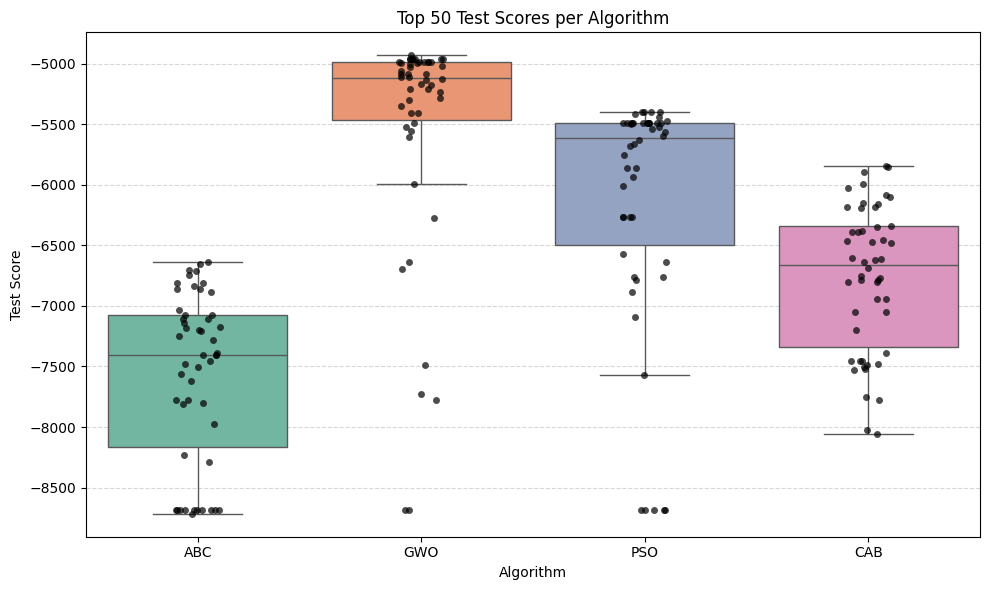

In [94]:
plot_top_algo_comparison(best_df, metric="test")

In [82]:
def plot_best_pop_and_gens(best_df):
    """
    Plot the best population size and generation count for each algorithm.

    Parameters:
        best_df (pd.DataFrame): Output from summarise_best_hyperparams_per_algo().
                                Must contain columns: 'alg', 'pop_size', 'gens'
    """
    if not {"alg", "pop_size", "gens"}.issubset(best_df.columns):
        raise ValueError("DataFrame must contain 'alg', 'pop_size', and 'gens' columns.")

    plt.figure(figsize=(10, 6))
    ax = sns.scatterplot(
        data=best_df,
        x="gens",
        y="pop_size",
        hue="alg",
        style="alg",
        s=150,
        palette="tab10"
    )

    for _, row in best_df.iterrows():
        plt.text(row["gens"] + 0.5, row["pop_size"] + 0.5, row["alg"], fontsize=10)

    plt.title("Best Population Size vs Generation Count per Algorithm")
    plt.xlabel("Number of Generations")
    plt.ylabel("Population Size")
    plt.grid(True, linestyle="--", alpha=0.6)
    plt.legend(title="Algorithm")
    plt.tight_layout()
    plt.show()
    

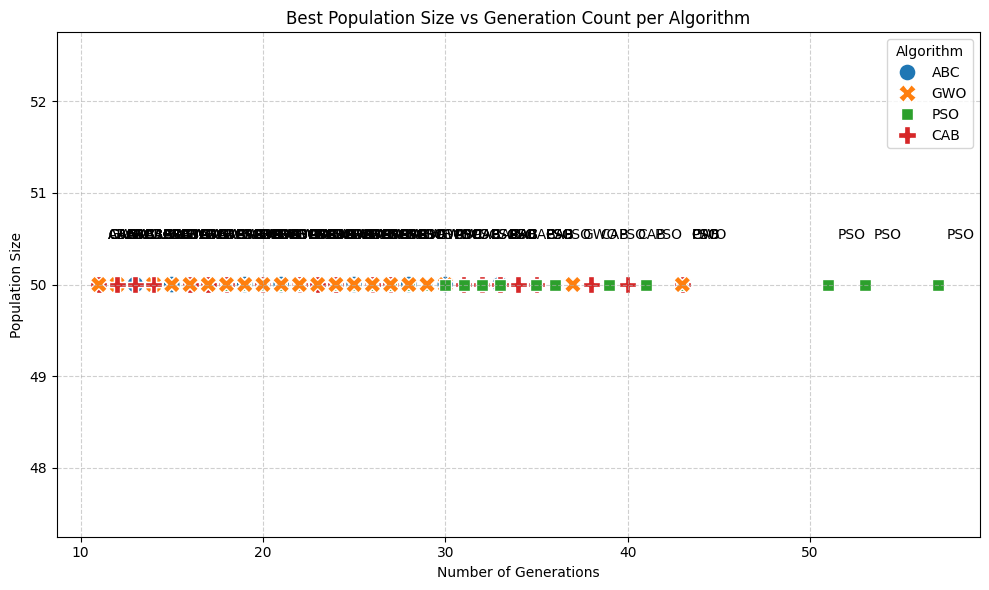

In [95]:
plot_best_pop_and_gens(best_df)

In [84]:
gwo_only = best_df[best_df["alg"] == "GWO"]
cab_only = best_df[best_df["alg"] == "CAB"]
abc_only = best_df[best_df["alg"] == "ABC"]
pso_only = best_df[best_df["alg"] == "PSO"]

In [85]:
print(gwo_only)

     alg  seed         train         test  \
2    GWO    68 -50141.231316 -8684.058276   
10   GWO   750 -54218.626484 -8684.058276   
23   GWO   100 -48517.278477 -7779.123947   
25   GWO   997 -48270.700171 -7727.294651   
33   GWO    13 -50124.045664 -7489.684648   
77   GWO   588 -43504.258559 -6692.856741   
80   GWO   840 -52241.332216 -6640.731009   
95   GWO   946 -42234.084104 -6273.946145   
105  GWO    23 -72504.696678 -5992.485595   
109  GWO   486 -72255.314366 -5607.617972   
110  GWO   975 -59493.508827 -5559.884241   
111  GWO   569 -27205.157268 -5526.311934   
112  GWO   237 -59434.271490 -5489.592406   
113  GWO   609 -39181.976912 -5405.171382   
114  GWO   568 -38220.304728 -5405.171382   
115  GWO   353 -79417.056697 -5354.210969   
116  GWO   277 -53407.529967 -5297.547462   
117  GWO   158 -53448.911207 -5280.485722   
118  GWO   909 -56995.605216 -5237.117766   
119  GWO   374 -35681.045756 -5213.010133   
120  GWO   877 -38663.241173 -5207.989677   
121  GWO  

In [86]:
def plot_theta_distribution(df, theta_col="theta_parsed", alg_filter=None):
    """
    Plot distribution of each theta parameter in a DataFrame, rounding integer-like parameters.

    Parameters:
        df (pd.DataFrame): DataFrame with a theta_parsed column (list of floats).
        theta_col (str): Name of the column with parsed theta lists.
        alg_filter (str or list, optional): Filter to specific algorithms if provided.
    """
    if alg_filter is not None:
        df = df[df["alg"].isin([alg_filter] if isinstance(alg_filter, str) else alg_filter)]

    theta_labels = [
        "d1 (fast window)",
        "t1 (fast type)",
        "α1 (fast alpha)",
        "d2 (slow window)",
        "t2 (slow type)",
        "α2 (slow alpha)",
        "buy_delay",
        "sell_delay"
    ]

    theta_matrix = np.vstack(df[theta_col].values)
    n_params = theta_matrix.shape[1]

    # Apply rounding to integer-like dimensions
    rounded = theta_matrix.copy()
    round_indices = [0, 1, 3, 4, 6, 7]  # indices of int-based parameters
    rounded[:, round_indices] = np.round(rounded[:, round_indices])

    fig, axes = plt.subplots(nrows=(n_params + 2) // 3, ncols=3, figsize=(15, 4 * ((n_params + 2) // 3)))
    axes = axes.flatten()

    for i in range(n_params):
        label = theta_labels[i] if i < len(theta_labels) else f"Theta[{i}]"
        sns.histplot(rounded[:, i], bins=20, ax=axes[i], kde=True, color="skyblue", edgecolor="black")
        axes[i].set_title(f"{label} Distribution")
        axes[i].set_xlabel(label)
        axes[i].set_ylabel("Count")

    for j in range(i + 1, len(axes)):
        axes[j].axis("off")

    plt.suptitle("Theta Parameter Distributions", fontsize=16)
    plt.tight_layout()
    plt.show()


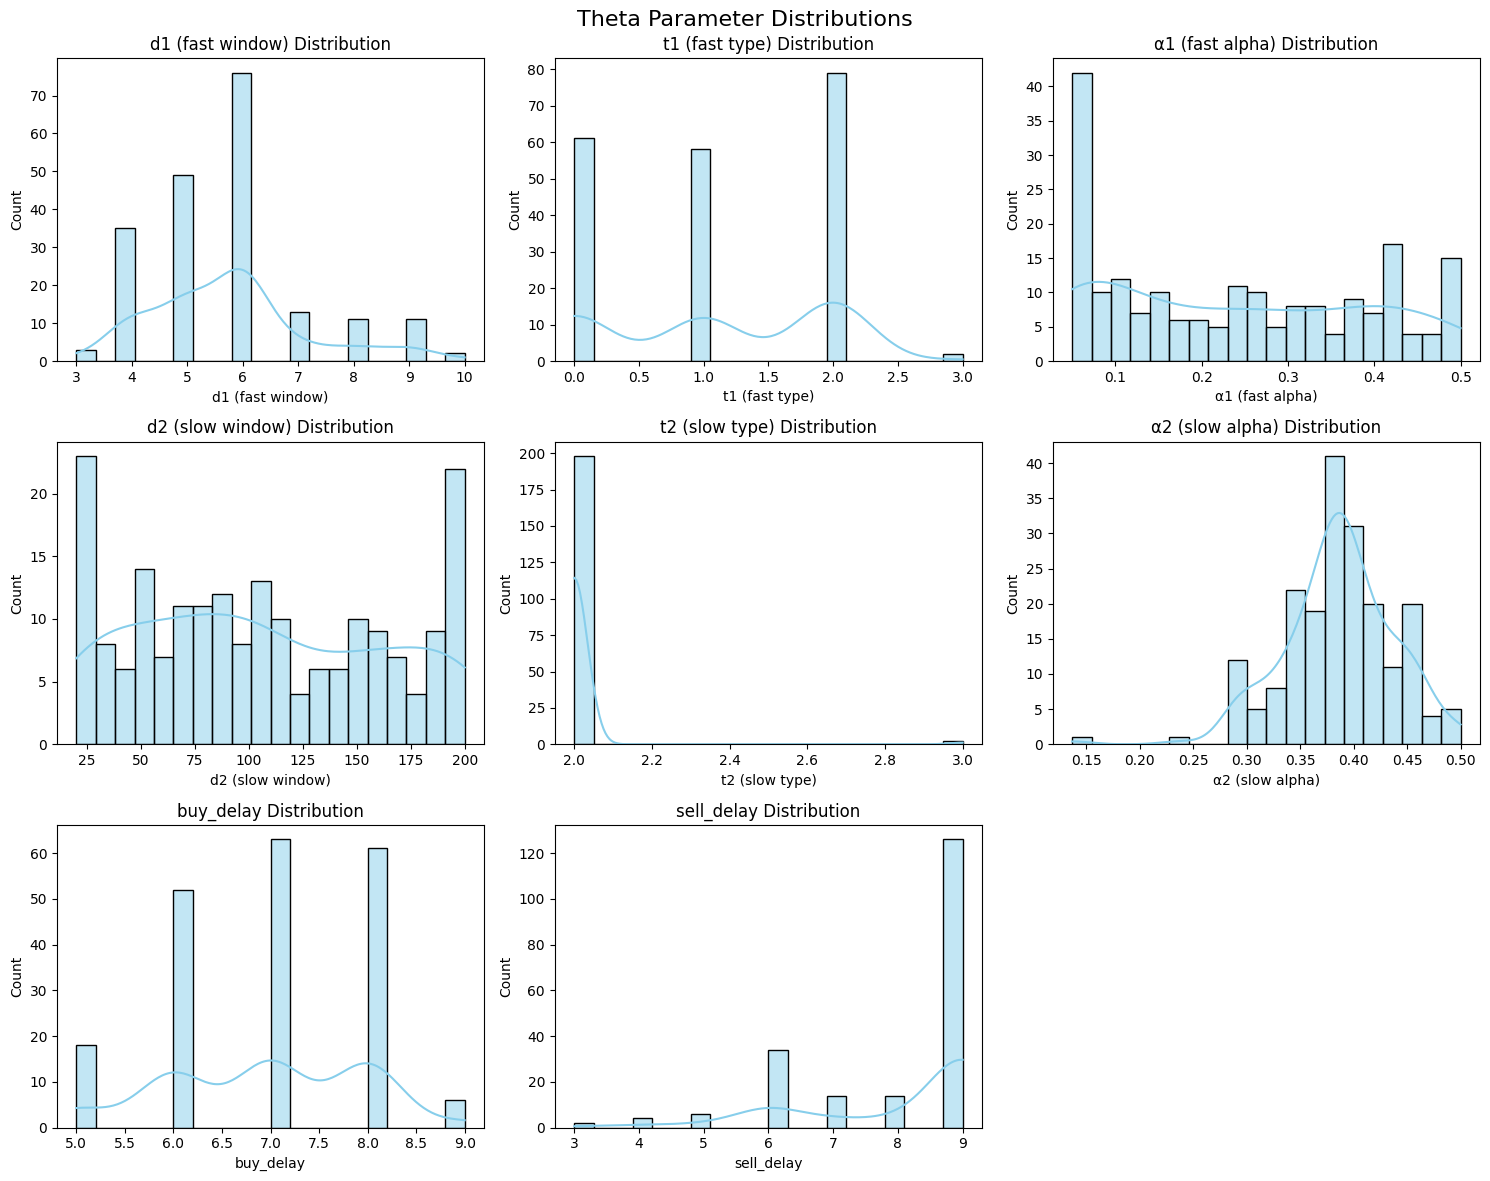

In [96]:
plot_theta_distribution(best_df)